## SEER Breast Cancer Survival Prediction

### Import Essential Libraries

In [1]:
# import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Loading Dataset & Data Understanding

In [33]:
# load the dataset
data = pd.read_csv('../data/seer_breastcancer_dataset.csv')

# check the dimension of the dataset
print('The dataset contains {} rows and {} columns'.format(data.shape[0], data.shape[1]))
# check the columns in the dataset
print('Attributes in the dataset including:', data.columns.values)
      
# view the first 5 rows of the dataset
data.head()

The dataset contains 4024 rows and 15 columns
Attributes in the dataset including: ['Age' 'Race' 'Marital Status' 'T Stage' 'N Stage' '6th Stage' 'Grade'
 'A Stage' 'Tumor Size' 'Estrogen Status' 'Progesterone Status'
 'Regional Node Examined' 'Regional Node Positive' 'Survival Months'
 'Status']


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [35]:
# summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A Stage                 4024 non-null   object
 8   Tumor Size              4024 non-null   int64 
 9   Estrogen Status         4024 non-null   object
 10  Progesterone Status     4024 non-null   object
 11  Regional Node Examined  4024 non-null   int64 
 12  Regional Node Positive  4024 non-null   int64 
 13  Survival Months         4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

### Attributes Description:

1. `Age` - age of the patient
2. `Race` - race of the patient
- Category: ['Other (American Indian/AK Native, Asian/Pacific Islander)','White', 'Black']
3. `Marital Status` - marital status
- Category: ['Married (including common law)','Divorced','Single (never married)','Widowed','Separated']
4. `T Stage` - part of the TNM staging system, T stage refers to the size and extent of the primary tumor
- Category: ['T2','T1','T3','T4']
5. `N Stage` - part of the TNM staging system, N stage refers to the involvement of nearby lymph nodes
- Category: ['N3','N2','N1']

6. `6th Stage` - breast Adjusted  American Joint Committee on Cancer (AJCC) 6th Stage
- Category: ['IIIC','IIIA','IIB','IIA','IIIB']
- Stage IIA: Any 1 of these conditions: There is no evidence of a tumor in the breast, but the cancer has spread to 1 to 3 axillary lymph nodes. It has not spread to distant parts of the body (T0, N1, M0). The tumor is 20 mm or smaller and has spread to 1 to 3 axillary lymph nodes (T1, N1, M0). The tumor is larger than 20 mm but not larger than 50 mm and has not spread to the axillary lymph nodes (T2, N0, M0).
- Stage IIB: Either of these conditions: The tumor is larger than 20 mm but not larger than 50 mm and has spread to 1 to 3 axillary lymph nodes (T2, N1, M0). The tumor is larger than 50 mm but has not spread to the axillary lymph nodes (T3, N0, M0).
- Stage IIIA: The tumor of any size has spread to 4 to 9 axillary lymph nodes or to internal mammary lymph nodes. It has not spread to other parts of the body (T0, T1, T2, or T3; N2; M0). Stage IIIA may also be a tumor larger than 50 mm that has spread to 1 to 3 axillary lymph nodes (T3, N1, M0).
- Stage IIIB: The tumor has spread to the chest wall or caused swelling or ulceration of the breast, or it is diagnosed as inflammatory breast cancer. It may or may not have spread to up to 9 axillary or internal mammary lymph nodes. It has not spread to other parts of the body (T4; N0, N1, or N2; M0).
- Stage IIIC: A tumor of any size that has spread to 10 or more axillary lymph nodes, the internal mammary lymph nodes, and/or the lymph nodes under the collarbone. It has not spread to other parts of the body (any T, N3, M0).

7. `Grade` - the differentiation grade. It refers to how much cancer cells resemble normal, healthy cells in terms of their structure and function. The degree of differentiation is an important characteristic used by pathologists to classify and describe cancer cells.
- Category: ['Moderately differentiated; Grade II','Poorly differentiated; Grade III', 'Well differentiated; Grade I','Undifferentiated; anaplastic; Grade IV']
- Well-differentiated (Low Grade): Well-differentiated cancer cells closely resemble normal cells in both structure and function. These cells tend to grow and spread at a slower rate compared to less-differentiated cells. In terms of cancer prognosis, well-differentiated cancers often have a better outlook.
- Moderately Differentiated (Intermediate Grade): Moderately differentiated cancer cells have some features of normal cells but also exhibit some abnormal characteristics. The degree of abnormality falls between well-differentiated and poorly differentiated cells.
- Poorly Differentiated (High Grade): Poorly differentiated cancer cells bear little resemblance to normal cells. They tend to grow and divide rapidly, and their appearance may be quite different from the tissue of origin. Poorly differentiated cancers are often associated with a more aggressive behavior and poorer prognosis.

8. `A Stage` 
- Category: ['Regional','Distant']
- Regional — A neoplasm that has extended
- Distant — A neoplasm that has spread to parts of the body remote from
9. `Tumor Size` - indicates exact size in millimeters
10. `Estrogen Status` - estrogen Status 
- Category: ['Positive','Negative']
11. `Progesterone Status` - progestrone status
- Category: ['Positive','Negative']
12. `Regional Node Examined` - refers to the number of regional lymph nodes that were examined during the diagnostic process.
13. `Regional Node Positive` - refers to the presence of cancer cells in the regional lymph nodes.
14. `Survival Months` - number of survival months
15. `Status` - status of the patient
- Category: ['Alive','Dead']

#### Data Types for each Feature

1. num_feats = ['Age','Tumor Size','Regional Node Examined','Regional Node Positive','Survival Months']
2. nominal_feats = ['Race','Marital Status']
3. ordinal_feats = ['T Stage','N Stage','6th Stage','differentiate']
4. binary_feats = ['A Stage','Estrogen Status','Progesterone Status']
5. target_feats = ['Status']

In [36]:
# convert the feature that is ordinal data to a Categorical type with the specified order
# feature that is ordinal data  - ['T Stage','N Stage','6th Stage','Grade']

# feature 'T Stage'
Tstage_order = ['T1', 'T2', 'T3', 'T4']
data['T Stage'] = pd.Categorical(data['T Stage'], categories=Tstage_order, ordered=True)

# feature 'N Stage'
Nstage_order = ['N1', 'N2', 'N3']
data['N Stage'] = pd.Categorical(data['N Stage'], categories=Nstage_order, ordered=True)

# feature '6th Stage'
sixstage_order = ['IIA','IIB','IIIA','IIIB','IIIC']
data['6th Stage'] = pd.Categorical(data['6th Stage'], categories=sixstage_order, ordered=True)

# feature 'Grade'
grade_order = ['Well differentiated; Grade I','Moderately differentiated; Grade II','Poorly differentiated; Grade III','Undifferentiated; anaplastic; Grade IV']
data['Grade'] = pd.Categorical(data['Grade'], categories=grade_order, ordered=True)

### Exploratory Data Analysis (EDA)
#### Target/Label Feature `Status`

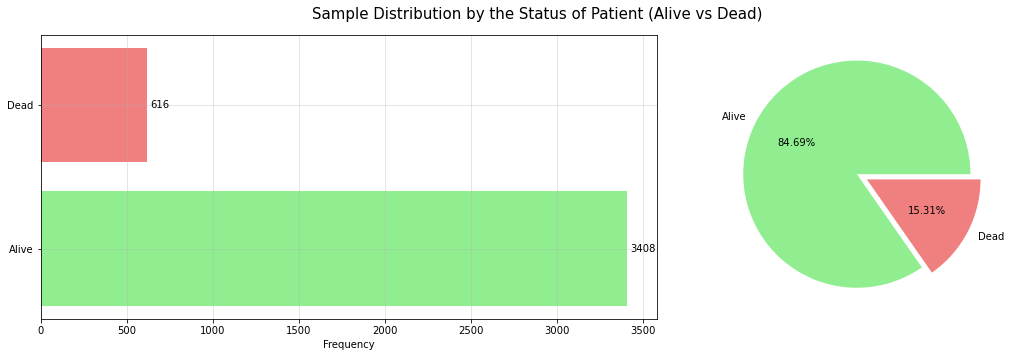

In [39]:
# visualize the sample distribution by the status of the patients
status = data['Status'].value_counts()
colors = ['lightgreen','lightcoral']

figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
axes[0].barh(y=status.index, width=status.values, color=colors)
axes[0].set_xlabel('Frequency')

for index, values in enumerate(status):
    axes[0].text(values+20, index, str(values), va='center')

axes[0].grid(alpha=0.4)

axes[1].pie(status.values, labels=status.index, autopct='%.2f%%', explode=([0.05]*len(status.index)), colors=colors)
figure.suptitle('Sample Distribution by the Status of Patient (Alive vs Dead)', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

#### Defining Two Helper Functions to Analyze the Relationship between Categorical and Numerical Features with the Target Features

In [40]:
# define a helper function to plot chart and perform Mann Whitney U test to compare numerical features between survived and dead patients
from scipy.stats import mannwhitneyu

def mwutest(feature):

    # visualization (histogram and boxplot)
    figure, axes = plt.subplots(1,2, figsize=(15,5), gridspec_kw={'width_ratios':[1.5,1]})
    sns.histplot(data=data, x=data[feature], hue=data['Status'], palette=colors, ax=axes[0])
    axes[0].grid(alpha=0.4)
    sns.boxplot(data=data, x=data['Status'], y=data[feature], palette=colors, ax=axes[1])
    axes[1].grid(alpha=0.4)
    figure.suptitle(f'Distribution of {feature} of Survived and Dead Patients', fontsize=15)
    plt.tight_layout(pad=1)
    plt.show()

    # grouping the patients by the status
    patients = data.groupby('Status')
    survived = patients.get_group('Alive')
    dead = patients.get_group('Dead')

    # display the 5 summary statistic
    display(patients[feature].describe())

    # perform Mann-Whitney U test to compare the numerical feature of the dead and survived patients
    res = mannwhitneyu(survived[feature], dead[feature])
    test_stat = round(res[0], 4)
    pvalue = round(res[1], 4)

    print('Test statistic: ', test_stat)
    print('Test p-value: ', pvalue)

    alpha = 0.05
    if pvalue < alpha:
        print(f'''\nReject null hypothesis. 
There is a statistically significant difference in the median {feature} between deceased and living cancer patients.
This suggests an association between {feature} and the status of cancer patients in the analyzed data.
        ''')
    else:
        print(f'''\nFailed to reject null hypothesis. 
There is no enough evidence to conclude a statistical significant association between {feature} and the status of the cancer patients in the analyzed data.
        ''')

In [41]:
# define a helper function to perform Chi-square test to study the association between categorical features and the target
from scipy.stats import chi2_contingency

def chi2test(feature, order):
    # distribution of samples by race
    # visulization (bar chart)
    plt.figure(figsize=(15,5))
    sns.countplot(data=data, x=data[feature], hue=data['Status'], order=order, palette=colors)
    plt.grid(alpha=0.4)
    plt.title(f'Distribution of Survived and Dead Patients by {feature}', fontsize=15)
    plt.show()

    # perform a Chi-square test to investigate the association
    contingency_table = pd.crosstab(data[feature],data['Status'])
    print('Contingency Table: ')
    display(contingency_table)

    res = chi2_contingency(contingency_table)
    test_stat = round(res[0], 4)
    pvalue = round(res[1], 4)
    expected_freq = res[3]

    print('Expected Frequency:')
    display(pd.DataFrame(expected_freq, columns=contingency_table.columns, index=contingency_table.index))

    print('Test statistic: ', test_stat)
    print('Test p-value:', pvalue)

    alpha = 0.05
    if pvalue < alpha:
        print(f'\nReject null hypothesis. There is a statistically significant association between {feature} and cancer survival in the analyzed data.')
    else:
        print(f'\nFail to reject null hypothesis. There is no enough evidence to conclude a statistically significant association between {feature} and cancer survival in the analyzed data.')

#### Relationship between Numerical Features with Target Feature
#### Question 1 | Is there a statistically significant difference in the median age between deceased and living cancer patients?

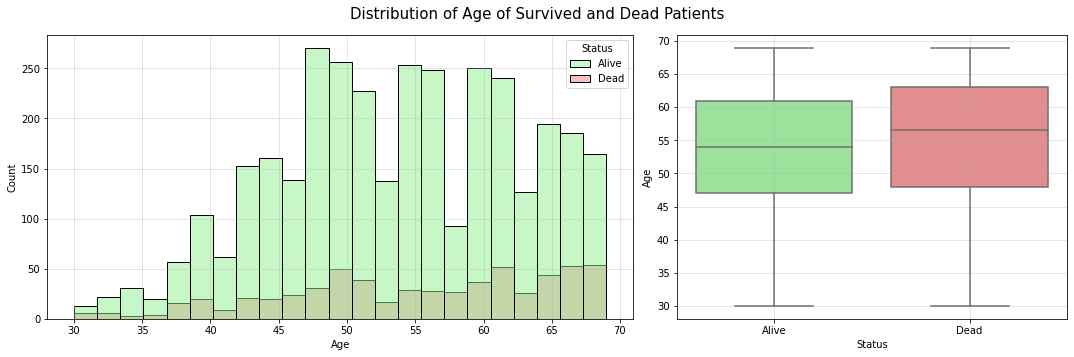

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Alive,3408.0,53.759096,8.808420,30.0,47.0,54.0,61.0,69.0
Dead,616.0,55.150974,9.698291,30.0,48.0,56.5,63.0,69.0


Test statistic:  944505.0
Test p-value:  0.0001

Reject null hypothesis. 
There is a statistically significant difference in the median Age between deceased and living cancer patients.
This suggests an association between Age and the status of cancer patients in the analyzed data.
        


In [42]:
mwutest('Age')

#### Question 2 | Is there a statistically significant difference in the median tumor size between deceased and living cancer patients?

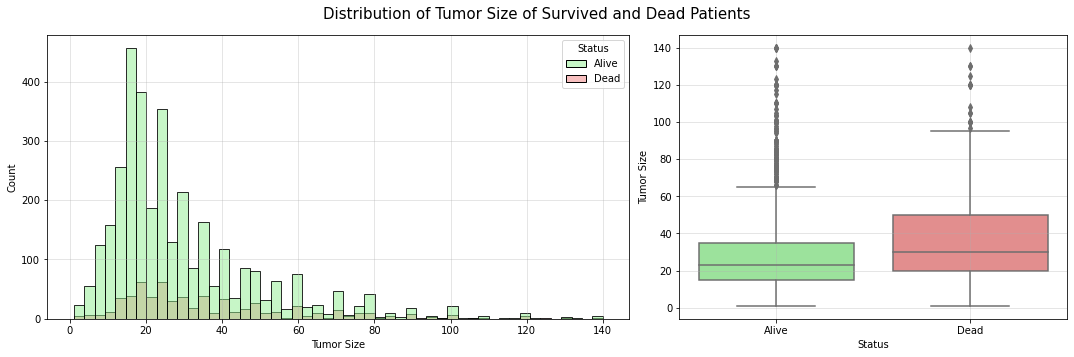

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Alive,3408.0,29.268779,20.303175,1.0,15.0,23.0,35.0,140.0
Dead,616.0,37.139610,24.116115,1.0,20.0,30.0,50.0,140.0


Test statistic:  813236.0
Test p-value:  0.0

Reject null hypothesis. 
There is a statistically significant difference in the median Tumor Size between deceased and living cancer patients.
This suggests an association between Tumor Size and the status of cancer patients in the analyzed data.
        


In [43]:
mwutest('Tumor Size')

#### Question 3 | Is there a statistically significant difference in the median number of regional nodes examined between deceased and living cancer patients?

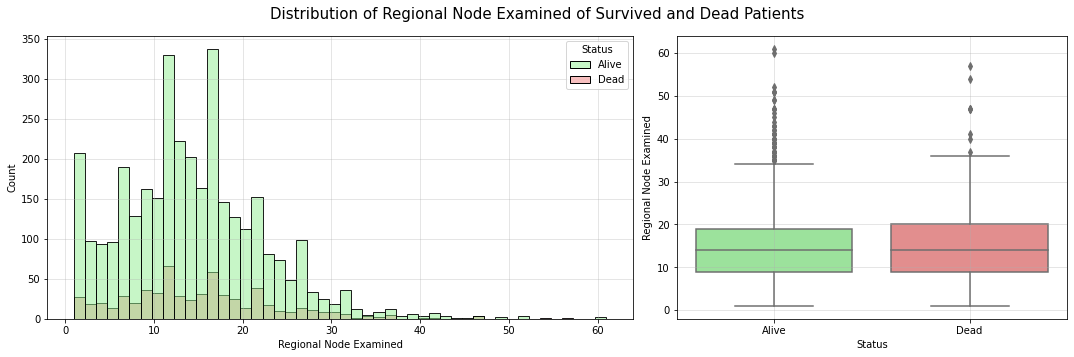

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Alive,3408.0,14.237383,8.023208,1.0,9.0,14.0,19.0,61.0
Dead,616.0,15.019481,8.486600,1.0,9.0,14.0,20.0,57.0


Test statistic:  1001152.0
Test p-value:  0.0673

Failed to reject null hypothesis. 
There is no enough evidence to conclude a statistical significant association between Regional Node Examined and the status of the cancer patients in the analyzed data.
        


In [44]:
mwutest('Regional Node Examined')

#### Question 4 | Is there a statistically significant difference in the median number of regional nodes examined with cancer cells between deceased and living cancer patients?

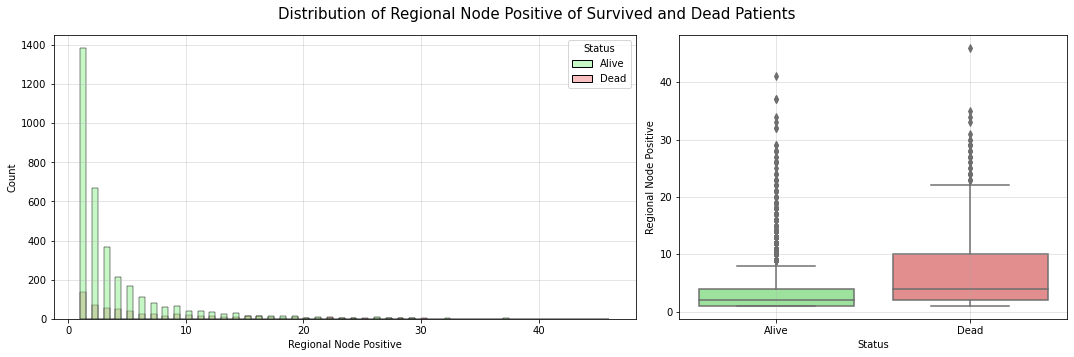

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Alive,3408.0,3.600646,4.375180,1.0,1.0,2.0,4.0,41.0
Dead,616.0,7.241883,7.312642,1.0,2.0,4.0,10.0,46.0


Test statistic:  692561.5
Test p-value:  0.0

Reject null hypothesis. 
There is a statistically significant difference in the median Regional Node Positive between deceased and living cancer patients.
This suggests an association between Regional Node Positive and the status of cancer patients in the analyzed data.
        


In [45]:
mwutest('Regional Node Positive')

#### Question 5 | Is there a statistically significant difference in the median survival months between deceased and living cancer patients?

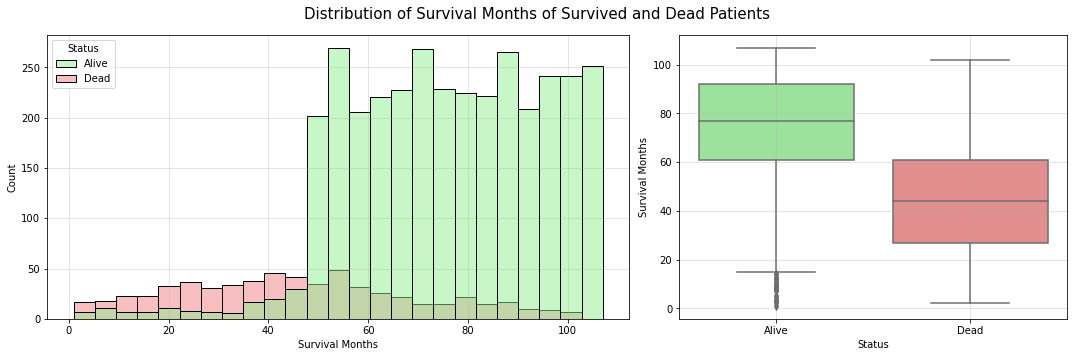

,count,mean,std,min,25%,50%,75%,max
Status,,,,,,,,
Alive,3408.0,75.941021,19.386459,1.0,61.0,77.0,92.0,107.0
Dead,616.0,45.610390,23.966253,2.0,27.0,44.0,61.0,102.0


Test statistic:  1748716.0
Test p-value:  0.0

Reject null hypothesis. 
There is a statistically significant difference in the median Survival Months between deceased and living cancer patients.
This suggests an association between Survival Months and the status of cancer patients in the analyzed data.
        


In [46]:
mwutest('Survival Months')

#### Relationship between Categorical Features with Target Feature
#### Question 6 | Is there a statistically significant association between race and cancer survival status (dead or alive) among patients?

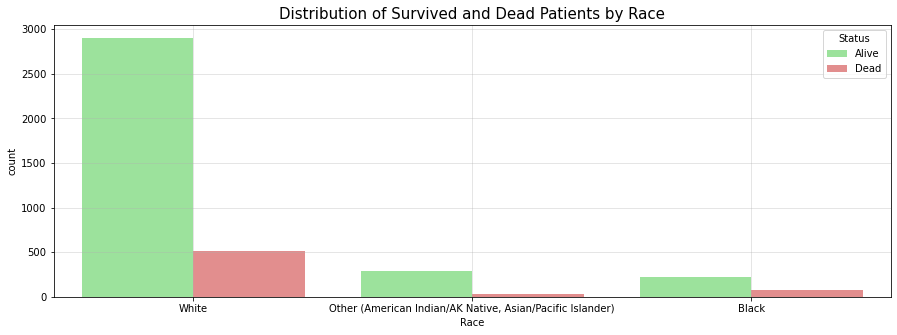

Contingency Table: 


Status,Alive,Dead
Race,,
Black,218,73
"Other (American Indian/AK Native, Asian/Pacific Islander)",287,33
White,2903,510


Expected Frequency:


Status,Alive,Dead
Race,,
Black,246.453280,44.546720
"Other (American Indian/AK Native, Asian/Pacific Islander)",271.013917,48.986083
White,2890.532803,522.467197


Test statistic:  27.97
Test p-value: 0.0

Reject null hypothesis. There is a statistically significant association between Race and cancer survival in the analyzed data.


In [47]:
Race_order = data['Race'].value_counts(ascending=False).index
chi2test('Race', Race_order)

#### Question 7 | Is there a statistically significant association between marital status and cancer survival status (dead or alive) among patients?

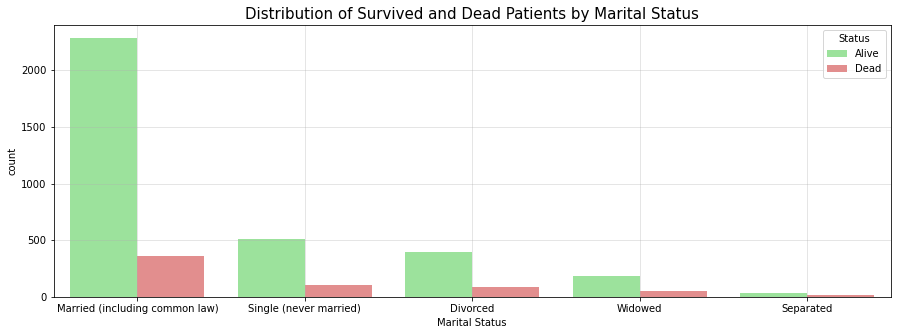

Contingency Table: 


Status,Alive,Dead
Marital Status,,
Divorced,396,90
Married (including common law),2285,358
Separated,30,15
Single (never married),511,104
Widowed,186,49


Expected Frequency:


Status,Alive,Dead
Marital Status,,
Divorced,411.602386,74.397614
Married (including common law),2238.405567,404.594433
Separated,38.111332,6.888668
Single (never married),520.854871,94.145129
Widowed,199.025845,35.974155


Test statistic:  28.2638
Test p-value: 0.0

Reject null hypothesis. There is a statistically significant association between Marital Status and cancer survival in the analyzed data.


In [48]:
marital_order = data['Marital Status'].value_counts(ascending=False).index
chi2test('Marital Status', marital_order)

#### Question 8 | Is there a statistically significant association between estrogen status and cancer survival status (dead or alive) among patients?

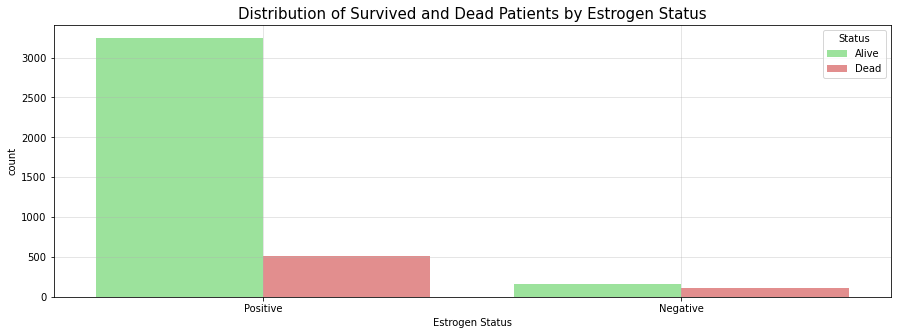

Contingency Table: 


Status,Alive,Dead
Estrogen Status,,
Negative,161,108
Positive,3247,508


Expected Frequency:


Status,Alive,Dead
Estrogen Status,,
Negative,227.821074,41.178926
Positive,3180.178926,574.821074


Test statistic:  135.1557
Test p-value: 0.0

Reject null hypothesis. There is a statistically significant association between Estrogen Status and cancer survival in the analyzed data.


In [49]:
estrogen_order = data['Estrogen Status'].value_counts(ascending=False).index
chi2test('Estrogen Status', estrogen_order)

#### Question 9 | Is there a statistically significant association between progesterone status and cancer survival status (dead or alive) among patients?

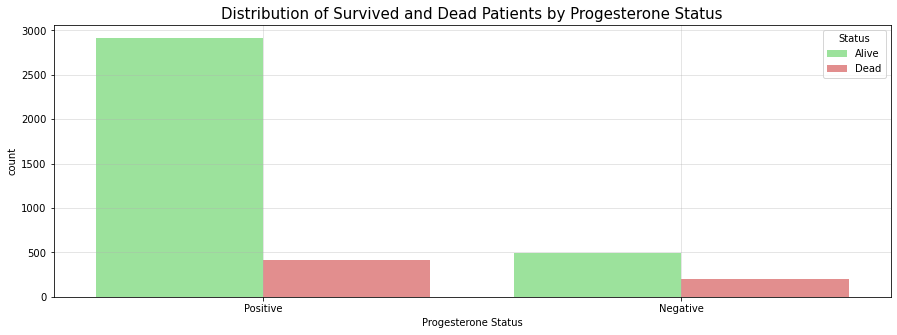

Contingency Table: 


Status,Alive,Dead
Progesterone Status,,
Negative,494,204
Positive,2914,412


Expected Frequency:


Status,Alive,Dead
Progesterone Status,,
Negative,591.149105,106.850895
Positive,2816.850895,509.149105


Test statistic:  124.8854
Test p-value: 0.0

Reject null hypothesis. There is a statistically significant association between Progesterone Status and cancer survival in the analyzed data.


In [50]:
progesterone_order = data['Progesterone Status'].value_counts(ascending=False).index
chi2test('Progesterone Status', progesterone_order)

#### Question 10 | Is there a statistically significant association between T stage level and cancer survival status (dead or alive) among patients?

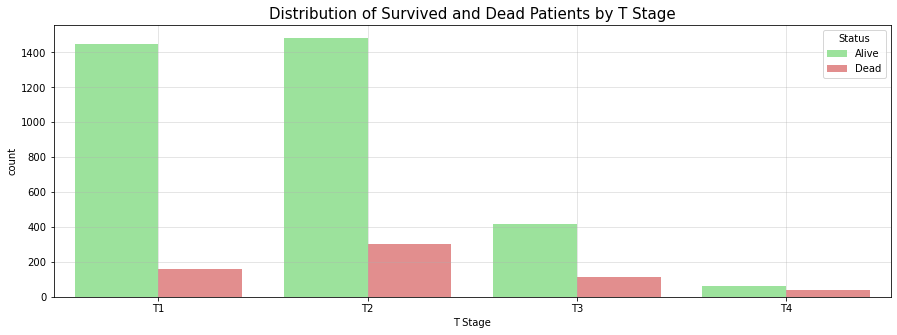

Contingency Table: 


Status,Alive,Dead
T Stage,,
T1,1446,157
T2,1483,303
T3,417,116
T4,62,40


Expected Frequency:


Status,Alive,Dead
T Stage,,
T1,1357.610338,245.389662
T2,1512.596421,273.403579
T3,451.407555,81.592445
T4,86.385686,15.614314


Test statistic:  103.4763
Test p-value: 0.0

Reject null hypothesis. There is a statistically significant association between T Stage and cancer survival in the analyzed data.


In [51]:
Tstage_order = ['T1', 'T2', 'T3', 'T4']
chi2test('T Stage', Tstage_order)

#### Question 11 | Is there a statistically significant association between N stage level and cancer survival status (dead or alive) among patients?

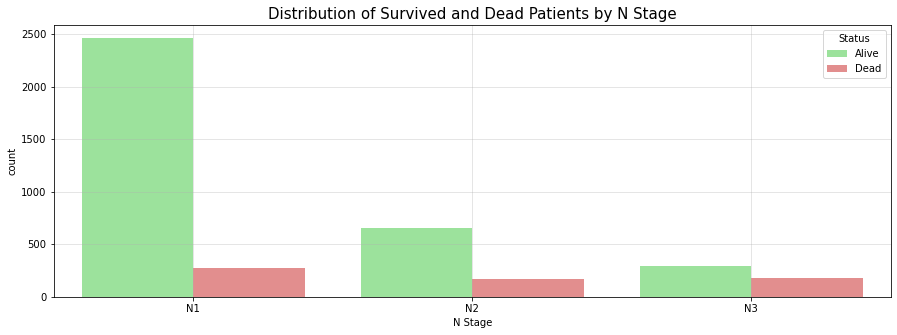

Contingency Table: 


Status,Alive,Dead
N Stage,,
N1,2462,270
N2,655,165
N3,291,181


Expected Frequency:


Status,Alive,Dead
N Stage,,
N1,2313.781312,418.218688
N2,694.473161,125.526839
N3,399.745527,72.254473


Test statistic:  269.9291
Test p-value: 0.0

Reject null hypothesis. There is a statistically significant association between N Stage and cancer survival in the analyzed data.


In [52]:
Nstage_order = ['N1', 'N2', 'N3']
chi2test('N Stage', Nstage_order)

#### Question 12 | Is there a statistically significant association between 6th Stage level and cancer survival status (dead or alive) among patients?

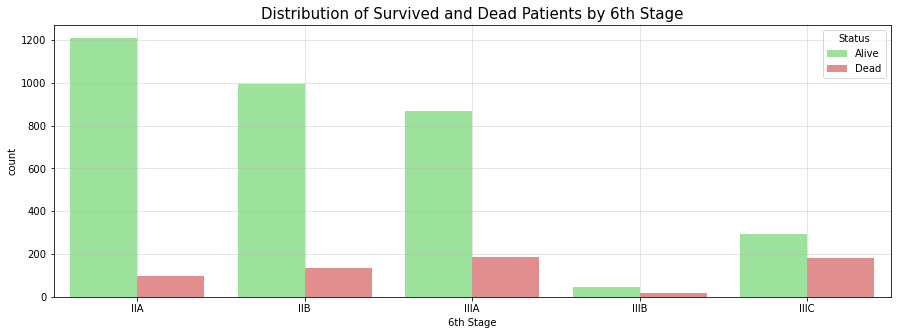

Contingency Table: 


Status,Alive,Dead
6th Stage,,
IIA,1209,96
IIB,995,135
IIIA,866,184
IIIB,47,20
IIIC,291,181


Expected Frequency:


Status,Alive,Dead
6th Stage,,
IIA,1105.228628,199.771372
IIB,957.017893,172.982107
IIIA,889.264414,160.735586
IIIB,56.743539,10.256461
IIIC,399.745527,72.254473


Test statistic:  281.6484
Test p-value: 0.0

Reject null hypothesis. There is a statistically significant association between 6th Stage and cancer survival in the analyzed data.


In [53]:
sixstage_order = ['IIA','IIB','IIIA','IIIB','IIIC']
chi2test('6th Stage', sixstage_order)

#### Question 13 | Is there a statistically significant association between A Stage level and cancer survival status (dead or alive) among patients?

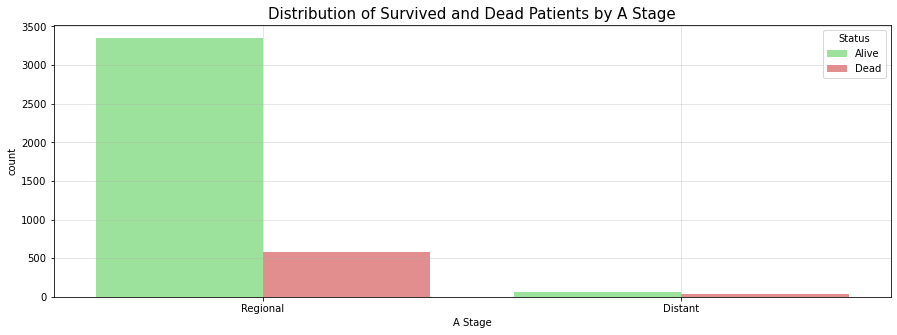

Contingency Table: 


Status,Alive,Dead
A Stage,,
Distant,57,35
Regional,3351,581


Expected Frequency:


Status,Alive,Dead
A Stage,,
Distant,77.916501,14.083499
Regional,3330.083499,601.916501


Test statistic:  35.7647
Test p-value: 0.0

Reject null hypothesis. There is a statistically significant association between A Stage and cancer survival in the analyzed data.


In [54]:
Astage_order = ['Regional','Distant']
chi2test('A Stage', Astage_order)

#### Question 14 | Is there a statistically significant association between the differentiated grade and cancer survival status (dead or alive) among patients?

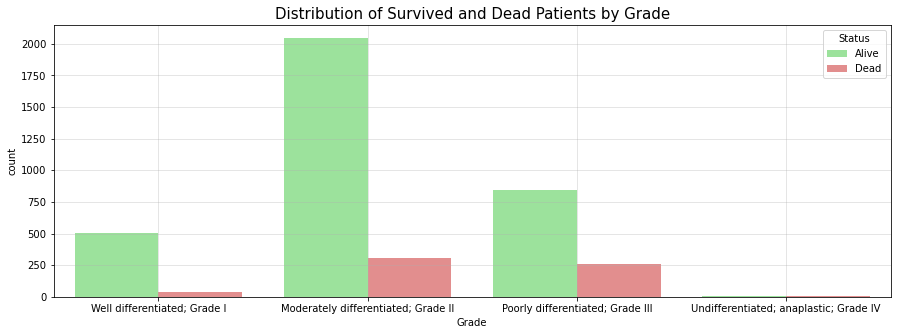

Contingency Table: 


Status,Alive,Dead
Grade,,
Well differentiated; Grade I,504,39
Moderately differentiated; Grade II,2046,305
Poorly differentiated; Grade III,848,263
Undifferentiated; anaplastic; Grade IV,10,9


Expected Frequency:


Status,Alive,Dead
Grade,,
Well differentiated; Grade I,459.876740,83.123260
Moderately differentiated; Grade II,1991.105368,359.894632
Poorly differentiated; Grade III,940.926441,170.073559
Undifferentiated; anaplastic; Grade IV,16.091451,2.908549


Test statistic:  112.5563
Test p-value: 0.0

Reject null hypothesis. There is a statistically significant association between Grade and cancer survival in the analyzed data.


In [55]:
grade_order = ['Well differentiated; Grade I','Moderately differentiated; Grade II','Poorly differentiated; Grade III','Undifferentiated; anaplastic; Grade IV']
chi2test('Grade', grade_order)

#### Relationship between Numerical Features (Correlation)
#### Question 15 | Is there any correlation between numerical features ['Age','Tumor Size','Regional Node Examined','Regional Node Positive','Survival Months'] ?

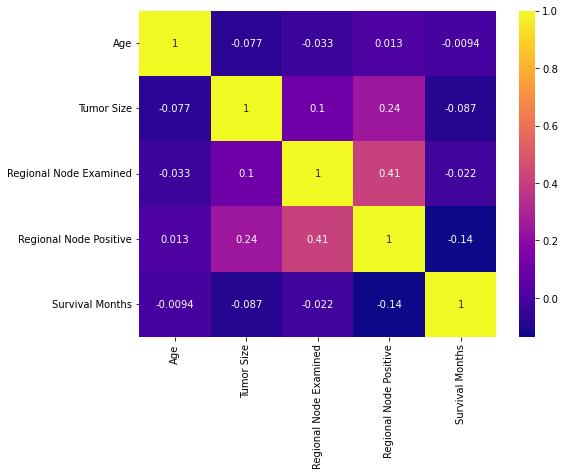

In [56]:
data_num = data[['Age','Tumor Size','Regional Node Examined','Regional Node Positive','Survival Months']]

# calculate the Pearson's correlation between numerical features
correlation = data_num.corr()

# visualize the correlation in a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, cmap='plasma')
plt.show()

### Classification
#### Data Pre-processing for Model Training

In [63]:
from sklearn.model_selection import train_test_split

# split the dataset into train and test dataset in 80:20 ratios
train, test = train_test_split(data, test_size=0.2, stratify=data['Status'], shuffle=True, random_state=122)

# check the dimension of the training and test datasets
print('Training data: ', train.shape)
print('Test data: ', test.shape)

Training data:  (3219, 15)
Test data:  (805, 15)


In [64]:
# segregate the feature matrix and target vector from the train and test datasets
Xtrain = train.drop(columns=['Status'], axis=1)
ytrain = train['Status']

Xtest = test.drop(columns=['Status'], axis=1)
ytest = test['Status']

In [65]:
# create a ColumnTransformer to transform the categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

# specify ordinal features and nominal features
ordinal_feats = ['T Stage','N Stage','6th Stage','Grade']
nominal_feats = ['Race','Marital Status'] + ['A Stage','Estrogen Status','Progesterone Status']

# Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('ordinal', OrdinalEncoder(), ordinal_feats),
        ('nominal', OneHotEncoder(drop='first'), nominal_feats)
    ],
    remainder='passthrough')

In [66]:
# encode the feature matrix (train and test) into numerical format
Xtrain_transformed = preprocessor.fit_transform(Xtrain)
Xtest_transformed = preprocessor.transform(Xtest)

In [67]:
# encode the target feature (train and test) into numerical format
encoder = LabelEncoder()
ytrain_encoded = encoder.fit_transform(ytrain)
ytest_encoded  = encoder.transform(ytest)

#### Model 1 | Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# create a Decision Tree Classifier
tree = DecisionTreeClassifier(class_weight='balanced', random_state=122)

# Define the hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# create the GridSearchCV object
grid_search_tree = GridSearchCV(tree, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# fit the grid search to the data
grid_search_tree.fit(Xtrain_transformed, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_tree.best_params_)
print('Best AUROC: ', grid_search_tree.best_score_)

# get the best model
best_tree = grid_search_tree.best_estimator_

Best Parameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
Best AUROC:  0.8036583065772355


In [96]:
# evaluate the best model on the test set
test_accuracy = best_tree.score(Xtest_transformed, ytest_encoded)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.7888198757763976


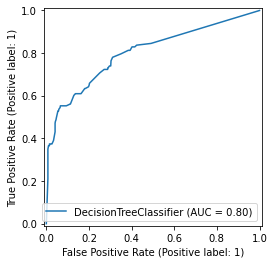

In [97]:
from sklearn.metrics import RocCurveDisplay

# check the ROC AUC curve
RocCurveDisplay.from_estimator(best_tree, Xtest_transformed, ytest_encoded)
plt.show()

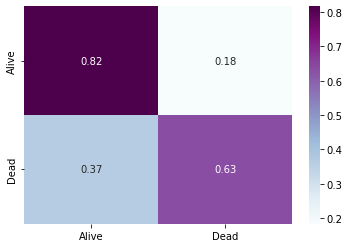

In [98]:
# visualize the confusion matrix using a heatmap
from sklearn.metrics import confusion_matrix

ypred_tree = best_tree.predict(Xtest_transformed)

labels = ytest.unique()

cm_tree = confusion_matrix(ytest_encoded, ypred_tree, normalize='true')
plt.figure()
sns.heatmap(cm_tree, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [99]:
from sklearn.metrics import classification_report
# classification report
print(classification_report(ytest_encoded, ypred_tree))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87       682
           1       0.38      0.63      0.48       123

    accuracy                           0.79       805
   macro avg       0.65      0.73      0.67       805
weighted avg       0.84      0.79      0.81       805



#### Model 2 | Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

# create a Random Forest Classifier
forest = RandomForestClassifier(class_weight='balanced', random_state=122)

# define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 4]
}

# create the GridSearchCV object
grid_search_forest = GridSearchCV(forest, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# fit the grid search to the data
grid_search_forest.fit(Xtrain_transformed, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_forest.best_params_)
print('Best AUROC: ', grid_search_forest.best_score_)

# get the best model
best_forest = grid_search_forest.best_estimator_

Best Parameters:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best AURCO:  0.8588315452048836


In [101]:
# evaluate the best model on the test set
test_accuracy = best_forest.score(Xtest_transformed, ytest_encoded)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.8993788819875776


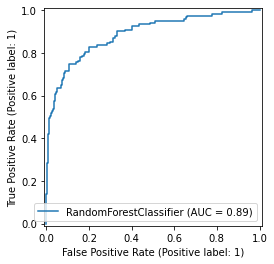

In [102]:
from sklearn.metrics import RocCurveDisplay

# check the ROC AUC curve
RocCurveDisplay.from_estimator(best_forest, Xtest_transformed, ytest_encoded)
plt.show()

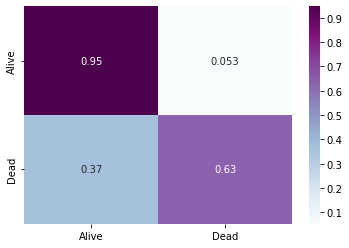

In [103]:
# visualize the confusion matrix using a heatmap
ypred_forest = best_forest.predict(Xtest_transformed)

labels = ytest.unique()

cm_forest = confusion_matrix(ytest_encoded, ypred_forest, normalize='true')
plt.figure()
sns.heatmap(cm_forest, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [104]:
# classification report
print(classification_report(ytest_encoded, ypred_forest))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       682
           1       0.68      0.63      0.66       123

    accuracy                           0.90       805
   macro avg       0.81      0.79      0.80       805
weighted avg       0.90      0.90      0.90       805



#### Model 3 | Logistic Regression

In [78]:
# scale the feature matrix of train and test for logistic regression
from sklearn.preprocessing import MinMaxScaler

# create the MinMaxScaler object
scaler = MinMaxScaler()
Xtrain_scaled = scaler.fit_transform(Xtrain_transformed)
Xtest_scaled = scaler.transform(Xtest_transformed)

In [89]:
from sklearn.linear_model import LogisticRegression

# create a logistic regression Classifier
logreg = LogisticRegression(class_weight='balanced', random_state=122, max_iter=5000)

# define the hyperparameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# create the GridSearchCV object
grid_search_logreg = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# fit the grid search to the data
grid_search_logreg.fit(Xtrain_scaled, ytrain_encoded)

# print the best parameters and the corresponding accuracy
print('Best Parameters: ', grid_search_logreg.best_params_)
print('Best AURCO: ', grid_search_logreg.best_score_)

# get the best model
best_logreg = grid_search_logreg.best_estimator_

Best Parameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best AURCO:  0.8549331732986479


In [90]:
# evaluate the best model on the test set
test_accuracy = best_logreg.score(Xtest_scaled, ytest_encoded)
print('Test Accuracy: ', test_accuracy)

Test Accuracy:  0.8248447204968944


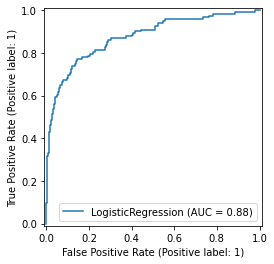

In [91]:
# check the ROC AUC curve

RocCurveDisplay.from_estimator(best_logreg, Xtest_scaled, ytest_encoded)
plt.show()

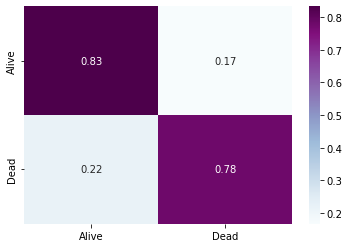

In [92]:
# visualize the confusion matrix using a heatmap
ypred_lr = best_logreg.predict(Xtest_scaled)

labels = ytest.unique()

cm_logistic = confusion_matrix(ytest_encoded, ypred_lr, normalize='true')
plt.figure()
sns.heatmap(cm_logistic, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [94]:
# classification report
print(classification_report(ytest_encoded, ypred_lr))

              precision    recall  f1-score   support

           0       0.95      0.83      0.89       682
           1       0.46      0.78      0.58       123

    accuracy                           0.82       805
   macro avg       0.71      0.81      0.73       805
weighted avg       0.88      0.82      0.84       805



#### Model 4 | Naive Bayes

In [84]:
from sklearn.naive_bayes import ComplementNB

clf = ComplementNB()
cNB = clf.fit(Xtrain_transformed, ytrain_encoded)

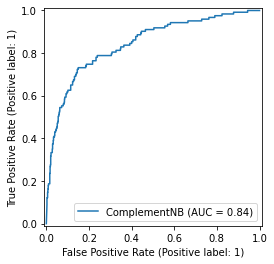

In [85]:
# check the ROC AUC curve

RocCurveDisplay.from_estimator(cNB, Xtest_transformed, ytest_encoded)
plt.show()

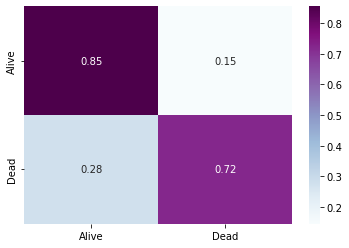

In [86]:
# visualize the confusion matrix using a heatmap
ypred_NB = cNB.predict(Xtest_transformed)

labels = ytest.unique()

cm_cNB = confusion_matrix(ytest_encoded, ypred_NB, normalize='true')
plt.figure()
sns.heatmap(cm_cNB, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels)
plt.show()

In [87]:
# classification report
print(classification_report(ytest_encoded, ypred_NB))

              precision    recall  f1-score   support

           0       0.94      0.85      0.90       682
           1       0.47      0.72      0.57       123

    accuracy                           0.83       805
   macro avg       0.71      0.79      0.73       805
weighted avg       0.87      0.83      0.85       805



#### Comparison of Various Classification Models

In [107]:
# define a helper function to perform model evaluation based on key metrics
from sklearn.metrics import precision_recall_fscore_support

def performance_evaluation(X,y,clf,classifier_name=''):
    ypred = clf.predict(X)
    accuracy = clf.score(X,y)
    precision, recall, fscore, support = precision_recall_fscore_support(y, ypred, average='macro', zero_division=0)
    metricName = ['Accuracy','Precision','Recall','F1_Score']
    metricValue = [accuracy,precision,recall,fscore]
    res = pd.DataFrame(metricValue, index=metricName, columns=[classifier_name])
    return res

In [108]:
# generate the performance summary for various models trained
tree_summary = performance_evaluation(Xtest_transformed,ytest_encoded,best_tree,'Decision Tree')
forest_summary = performance_evaluation(Xtest_transformed,ytest_encoded,best_forest,'Random Forest')
logistic_summary = performance_evaluation(Xtest_scaled,ytest_encoded,best_logreg,'Logistic Regression')
naivebayes_summary = performance_evaluation(Xtest_transformed,ytest_encoded,cNB,'Naive Bayes')

# combine the summary of each model into a dataframe 
comparison_df = pd.concat([tree_summary,forest_summary,logistic_summary,naivebayes_summary], axis=1)

# disply the summary dafaframe
display(comparison_df)

,Decision Tree,Random Forest,Logistic Regression,Naive Bayes
Accuracy,0.788820,0.899379,0.824845,0.834783
Precision,0.654743,0.809544,0.705882,0.709149
Recall,0.725431,0.790680,0.806666,0.789208
F1_Score,0.673064,0.799616,0.733081,0.734980


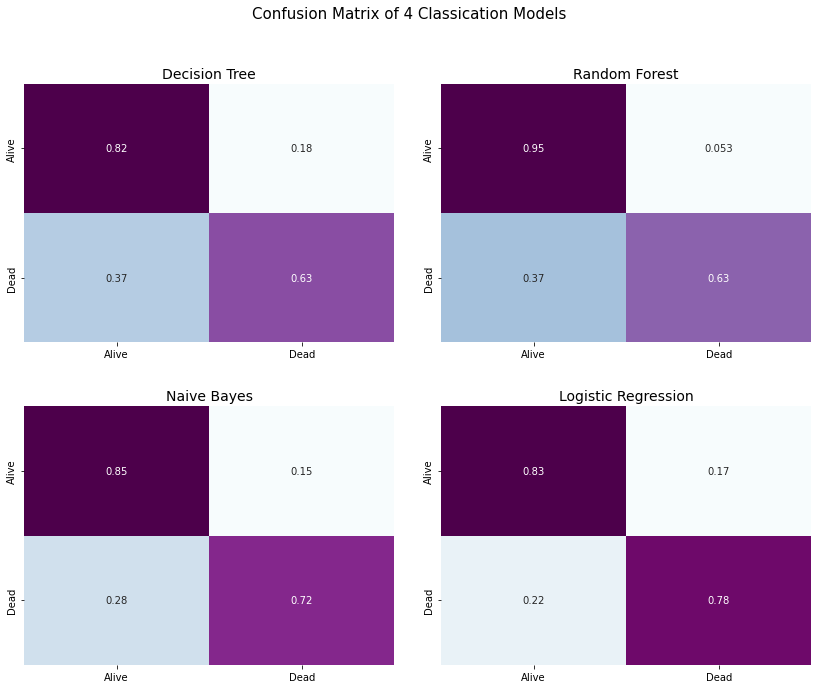

In [109]:
# confusion matrix for 4 classification models
figure, axes = plt.subplots(2,2, figsize=(12,10))
sns.heatmap(cm_tree, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[0,0])
axes[0,0].set_title('Decision Tree', fontsize=14)
sns.heatmap(cm_forest, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[0,1])
axes[0,1].set_title('Random Forest', fontsize=14)
sns.heatmap(cm_cNB, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[1,0])
axes[1,0].set_title('Naive Bayes', fontsize=14)
sns.heatmap(cm_logistic, annot=True, cmap='BuPu', xticklabels=labels, yticklabels=labels, cbar=False, ax=axes[1,1])
axes[1,1].set_title('Logistic Regression', fontsize=14)
figure.suptitle('Confusion Matrix of 4 Classication Models', fontsize=15)
plt.tight_layout(pad=3)
plt.show()